<a href="https://colab.research.google.com/github/Sachin-D-N/Amazon_Food_Reviews/blob/main/09.Clustering_Analysis_Amazon_Food_Reviews/Clustering_Analysis_Amazon_Food_Reviews_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Assignment : Apply K-Means, Agglomerative & DBSCAN Clustering

<ol>
    <li><strong>Apply K-means Clustering on these feature sets:</strong>
        <ul>
    <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
    <li>Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)</li>
    <li>Once after you find the k clusters, plot the word cloud per each cluster so that at a single
go we can analyze the words in a cluster.</li>          
        </ul>
    </li>
    <br>
    <li><strong>Apply Agglomerative Clustering on these feature sets:</strong>
        <ul>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
    <li>Apply agglomerative algorithm and try a different number of clusters like 2,5 etc.</li>
    <li>Same as that of K-means, plot word clouds for each cluster and summarize in your own words what that cluster is representing.</li>
            <li>You can take around 5000 reviews or so(as this is very computationally expensive one)</li>
        </ul>
    </li>
    <br>
    <br>
    <li><strong>Apply DBSCAN Clustering on these feature sets:</strong>
        <ul>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
    <li>Find the best ‘Eps’ using the <a href='https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#48558030'>elbow-knee method.</a></li>
    <li>Same as before, plot word clouds for each cluster and summarize in your own words what that cluster is representing.</li>
            <li>You can take around 5000 reviews for this as well.</li>
        </ul>
    </li>
</ol>

###  we already strored the preprocessed_data in a file to know the preprocessing steps visit <a href='https://github.com/Sachin-D-N/Amazon_Food_Reviews/blob/master/Amazon_Food_Reviews_Sentiment_Analysis/Assignment%20_1_tSNE%20analysis/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb'>here </a>

In [ ]:
#loading Libraries
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the preprocessed data 
data=pd.read_csv('/content/drive/My Drive/preprocessed_data.csv',nrows=100000) 

In [ ]:
data.head()

Id  ...               preprocessed_summary
0  150524  ...                    everi book educ
1  150506  ...  love book miss hard cover version
2  150507  ...            chicken soup rice month
3  150508  ...      good swingi rhythm read aloud
4  150509  ...              great way learn month

[5 rows x 12 columns]

In [ ]:
#here we only used preprocessed_reviews because it's a unsupervised learning method
X=data['preprocessed_reviews'][:5000]

In [ ]:
print(X.shape)

(5000,)


# Featurization using Bag_of_words

In [ ]:
#Apply Bow Features on Splitted data
from sklearn.feature_extraction.text import CountVectorizer
Vect=CountVectorizer(min_df = 100)
Bow_data=Vect.fit_transform(X)
print(Bow_data.shape)

(5000, 364)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if __name__ == '__main__':


# K-Means Clustering

Applying K-Means Clustering on BOW Features

In [ ]:
from sklearn.cluster import KMeans
k_values = [2,3,4,5,6,7,8,9,10]
loss = []
for i in k_values:
    clf_Bow= KMeans(n_clusters=i, n_jobs=-1)
    clf_Bow.fit(Bow_data)
    kmeans=clf_Bow.inertia_
    loss.append(kmeans)

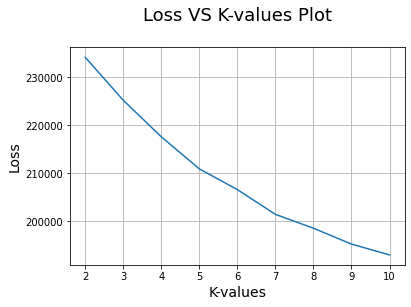

In [ ]:
# Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

In [ ]:
#we can see that at k=5 there is a point of inflection
k=5
model=KMeans(n_clusters=5, n_jobs=-1)
model.fit(Bow_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Wordclouds of clusters obtained after applying k-means on BOW

In [ ]:
cloud_Bow = X.values

In [ ]:
cloud_Bow

array(['witti littl book make son laugh loud recit car drive along alway sing refrain learn whale india droop rose love new word book introduc silli classic book will bet son still abl recit memori colleg',
       'grew read sendak book watch realli rosi movi incorpor love son love howev miss hard cover version paperback seem kind flimsi take two hand keep page open',
       'fun way children learn month year learn poem throughout school year like handmot invent poem',
       ...,
       'one best spice ever use great everyth found origin whole food use amazon',
       'sent niec time newborn blue could not nurs much pain sens sent cheesecak love said made day thought husband enjoy treat appreci gestur way',
       'ship fee littl expect live switzerland sent friend live boston realli worth asher recipi mini cheesecak say thank much wonder christma present noth ever imagin might think along line perhap small christma pud bottl wine origin think uniqu idea enjoy extrem also want say man

In [ ]:
# writing a function of word_cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=100, 
        scale=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
cluster1,cluster2,cluster3,cluster4,cluster5=[],[],[],[],[]

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(cloud_Bow[i])
    elif model.labels_[i] == 1:
        cluster2.append(cloud_Bow[i])
    elif model.labels_[i] == 2:
        cluster3.append(cloud_Bow[i])
    elif model.labels_[i] == 3:
        cluster4.append(cloud_Bow[i])
    else :
        cluster5.append(cloud_Bow[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster_1 : ",len(cluster1))
print("\nNo. of reviews in Cluster_2 : ",len(cluster2))
print("\nNo. of reviews in Cluster_3 : ",len(cluster3))
print("\nNo. of reviews in Cluster_4 : ",len(cluster4))
print("\nNo. of reviews in Cluster_5 : ",len(cluster5))

No. of reviews in Cluster_1 :  36

No. of reviews in Cluster_2 :  54

No. of reviews in Cluster_3 :  3936

No. of reviews in Cluster_4 :  746

No. of reviews in Cluster_5 :  228


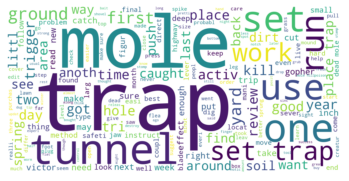

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

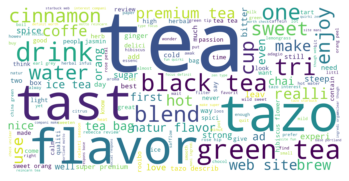

In [ ]:
#Word_cloud for cluster 2

show_wordcloud(cluster2)

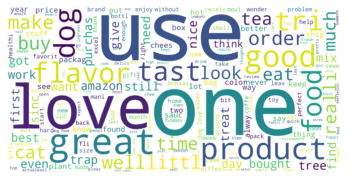

In [ ]:
#Word_cloud for cluster 3

show_wordcloud(cluster3)

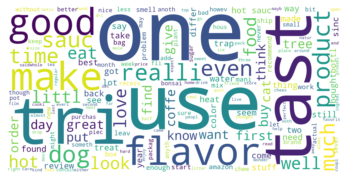

In [ ]:
#Word_cloud for cluster 4

show_wordcloud(cluster4)

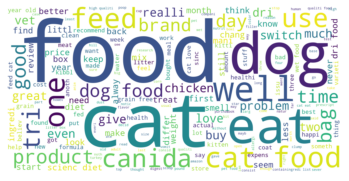

In [ ]:
#Word_cloud for cluster 5

show_wordcloud(cluster5)


Top terms per clusters

In [ ]:
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top 5 terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = Vect.get_feature_names()
for i in range(k):
    print("Cluster %d:" % (i+1), end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind], end=',')
        
    print('-'*5)

Top 5 terms per cluster:
Cluster 1: trap, mole, not, set, one,-----
Cluster 2: tea, flavor, not, green, like,-----
Cluster 3: not, love, great, use, dog,-----
Cluster 4: not, like, one, use, would,-----
Cluster 5: food, cat, not, dog, eat,-----


Applying K-Means Clustering on TFIDF Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=100)
Tf_idf_data=tf_idf_vect.fit_transform(X)
Tf_idf_data.shape

(5000, 377)

In [ ]:
k_values = [2,3,4,5,6,7,8,9,10]
loss_tf = []
for i in k_values:
    clf_tf = KMeans(n_clusters=i, n_jobs=-1).fit(Tf_idf_data)
    kmeans_tf=clf_tf.inertia_
    loss_tf.append(kmeans_tf)

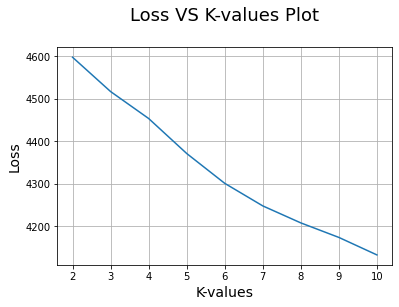

In [ ]:
# Draw Loss VS K values plot
plt.plot(k_values, loss_tf)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

In [ ]:
 #we can see that at k=5 there is a point of inflection
model=KMeans(n_clusters=5, n_jobs=-1)
model.fit(Tf_idf_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cloud_tfidf=X.values

In [ ]:
cluster1,cluster2,cluster3,cluster4,cluster5=[],[],[],[],[]

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(cloud_tfidf[i])
    elif model.labels_[i] == 1:
        cluster2.append(cloud_tfidf[i])
    elif model.labels_[i] == 2:
        cluster3.append(cloud_tfidf[i])
    elif model.labels_[i] == 3:
        cluster4.append(cloud_tfidf[i])
    else :
        cluster5.append(cloud_tfidf[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster_1 : ",len(cluster1))
print("\nNo. of reviews in Cluster_2 : ",len(cluster2))
print("\nNo. of reviews in Cluster_3 : ",len(cluster3))
print("\nNo. of reviews in Cluster_4 : ",len(cluster4))
print("\nNo. of reviews in Cluster_5 : ",len(cluster5))

No. of reviews in Cluster_1 :  258

No. of reviews in Cluster_2 :  733

No. of reviews in Cluster_3 :  478

No. of reviews in Cluster_4 :  330

No. of reviews in Cluster_5 :  3201


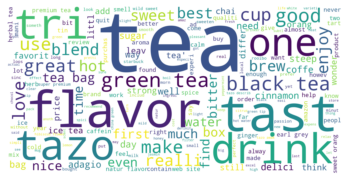

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

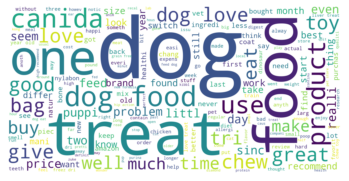

In [ ]:
#Word_cloud for cluster 2

show_wordcloud(cluster2)

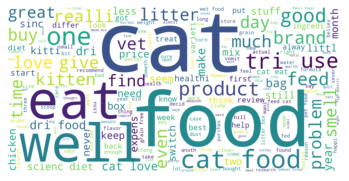

In [ ]:
#Word_cloud for cluster 3

show_wordcloud(cluster3)

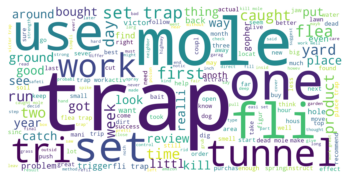

In [ ]:
#Word_cloud for cluster 4

show_wordcloud(cluster4)

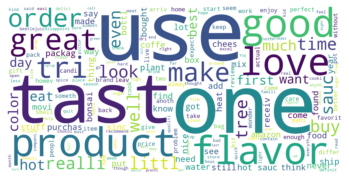

In [ ]:
#Word_cloud for cluster 5

show_wordcloud(cluster5)

In [ ]:
# top terms per cluster
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top 5 terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vect.get_feature_names()
for i in range(k):
    print("Cluster %d:" % (i+1), end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind], end=',')
        
    print('-'*5)

Top 5 terms per cluster:
Cluster 1: tea, flavor, drink, not, tast,-----
Cluster 2: dog, treat, food, love, not,-----
Cluster 3: cat, food, eat, not, cat food,-----
Cluster 4: trap, mole, fli, set, work,-----
Cluster 5: not, great, like, use, tast,-----


# Applying K-Means Clustering on AVG W2V

 Featurization using Word2Vec

In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in X:
    list_of_sentance.append(sentance.split())

In [ ]:
print(len(list_of_sentance))

5000


In [ ]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)    

In [ ]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  3661
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'learn', 'india', 'rose', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'movi', 'howev', 'miss', 'hard', 'cover', 'version', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand', 'keep', 'page', 'open', 'fun', 'way', 'children', 'month']


# Converting text into vectors using Avg W2V

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vectors.append(sent_vec)
vectors = np.array(vectors)
print(vectors.shape)
print(vectors[0])

(5000, 50)
[-0.08380012  0.24481716  0.09326252 -0.39558384  0.0406839   0.40177233
 -0.12878312  0.00742205  0.53289175  0.24640664 -0.3400776   0.02380869
  0.37585928 -0.03247807  0.1983804  -0.02267431  0.23407692 -0.03532639
 -0.0234988  -0.1346686  -0.35373729 -0.15794696 -0.51143298 -0.45717582
  0.26120456 -0.2924118  -0.17934177 -0.09039205  0.01191807 -0.14448023
  0.34061208 -0.126925   -0.63547316  0.21762024 -0.06784104  0.33571189
  0.03168192  0.15008371  0.09609972 -0.22158779  0.58903269  0.09458968
 -0.47793334 -0.21081817  0.27827733  0.33498892  0.12876654  0.21585954
 -0.30480009 -0.2781266 ]


In [ ]:
avgw2v= np.array(vectors)

In [ ]:
k_values = [2,3,4,5,6,7,8,9,10]
loss_avgw2v = []
for i in k_values:
    clf_avgw2v = KMeans(n_clusters=i, n_jobs=-1).fit(avgw2v)
    kmeans_avgw2v=clf_avgw2v.inertia_
    loss_avgw2v.append(kmeans_avgw2v)

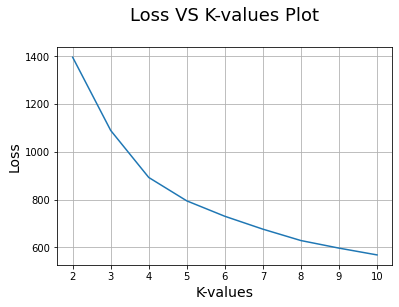

In [ ]:
# Draw Loss VS K values plot
plt.plot(k_values, loss_avgw2v)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

In [ ]:
#we can see that at k=4 there is a point of inflection
model=KMeans(n_clusters=4, n_jobs=-1)
model.fit(avgw2v)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cloud_w2v=X.values

In [ ]:
cluster1,cluster2,cluster3,cluster4=[],[],[],[]

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(cloud_w2v[i])
    elif model.labels_[i] == 1:
        cluster2.append(cloud_w2v[i])
    elif model.labels_[i] == 2:
        cluster3.append(cloud_w2v[i])
    else:
        cluster4.append(cloud_w2v[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-1 :  836

No. of reviews in Cluster-2 :  1124

No. of reviews in Cluster-3 :  959

No. of reviews in Cluster-4 :  2081


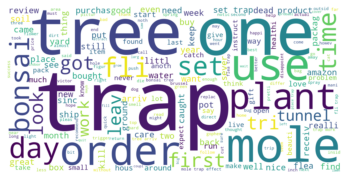

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

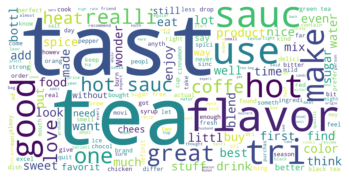

In [ ]:
#Word_cloud for cluster 2

show_wordcloud(cluster2)

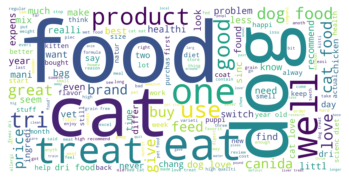

In [ ]:
#Word_cloud for cluster 3

show_wordcloud(cluster3)

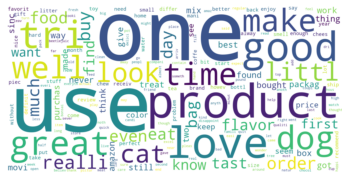

In [ ]:
#Word_cloud for cluster 4

show_wordcloud(cluster4)

# Applying K-Means Clustering on TFIDF W2V

Converting text into vectors using TFIDF W2V

In [ ]:
tfidf_vect = TfidfVectorizer()
train_tfidf_w2v = tfidf_vect.fit_transform(X)

In [ ]:
dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))

In [ ]:
# tf_idf_w2v words of train data
tfidf_feat = tfidf_vect.get_feature_names()
tfidf_w2v_vectors = []
row = 0
for sent in list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
tfidf_avgw2v= np.array(tfidf_w2v_vectors)

In [ ]:
k_values = [2,3,4,5,6,7,8,9,10]
loss_tfw2v = []
for i in k_values:
    clf_tfw2v = KMeans(n_clusters=i, n_jobs=-1).fit(tfidf_avgw2v)
    kmeans_tfw2v=clf_tfw2v.inertia_
    loss_tfw2v.append(kmeans_tfw2v)

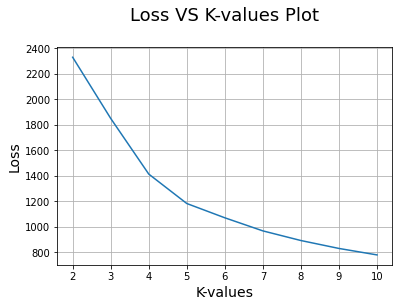

In [ ]:
# Draw Loss VS K values plot
plt.plot(k_values, loss_tfw2v)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

In [ ]:
#we can see that at k=4 there is a point of inflection
model=KMeans(n_clusters=4, n_jobs=-1)
model.fit(tfidf_avgw2v)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cloud_tfw2v=X.values

In [ ]:
cluster1,cluster2,cluster3,cluster4=[],[],[],[]

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(cloud_tfw2v[i])
    elif model.labels_[i] == 1:
        cluster2.append(cloud_tfw2v[i])
    elif model.labels_[i] == 2:
        cluster3.append(cloud_tfw2v[i])
    else:
        cluster4.append(cloud_tfw2v[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-1 :  515

No. of reviews in Cluster-2 :  806

No. of reviews in Cluster-3 :  2788

No. of reviews in Cluster-4 :  891


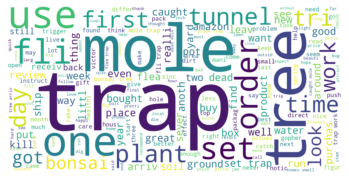

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

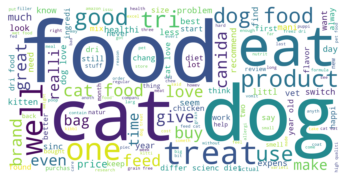

In [ ]:
#Word_cloud for cluster 2

show_wordcloud(cluster2)

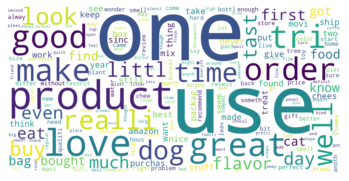

In [ ]:
#Word_cloud for cluster 3

show_wordcloud(cluster3)

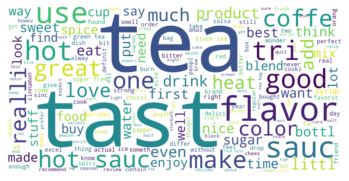

In [ ]:
#Word_cloud for cluster 4

show_wordcloud(cluster4)

# Agglomerative Clustering

Applying Agglomerative Clustering on AVG W2V features

In [ ]:
avgw2v.shape

(5000, 50)

 Applying Agglomerative Clustering with 2 cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=2)
model.fit(avgw2v)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(cloud_w2v[i])
    else :
        cluster2.append(cloud_w2v[i])
         
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))

No. of reviews in Cluster-1 :  3933

No. of reviews in Cluster-2 :  1067


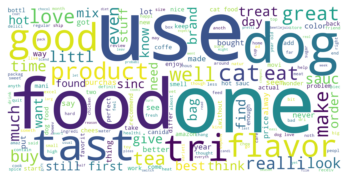

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

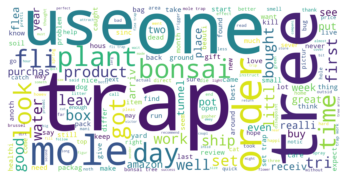

In [ ]:
#Word_cloud for cluster 2

show_wordcloud(cluster2)

 Applying Agglomerative Clustering with 5 cluster

In [ ]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(avgw2v)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [ ]:
cluster1,cluster2,cluster3,cluster4,cluster5=[],[],[],[],[]

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(cloud_w2v[i])
    elif model.labels_[i] == 1:
        cluster2.append(cloud_w2v[i])
    elif model.labels_[i] == 2:
        cluster3.append(cloud_w2v[i])
    elif model.labels_[i] == 3:
        cluster4.append(cloud_w2v[i])
    else :
        cluster5.append(cloud_w2v[i])
         
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))
print("\nNo. of reviews in Cluster-5 : ",len(cluster5))

No. of reviews in Cluster-1 :  1295

No. of reviews in Cluster-2 :  1255

No. of reviews in Cluster-3 :  632

No. of reviews in Cluster-4 :  1383

No. of reviews in Cluster-5 :  435


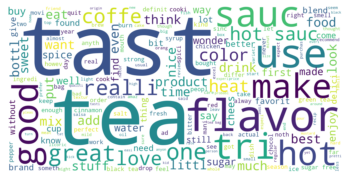

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

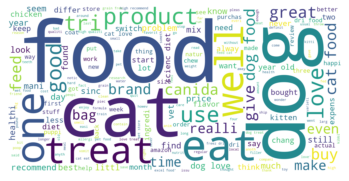

In [ ]:
#Word_cloud for cluster 2

show_wordcloud(cluster2)

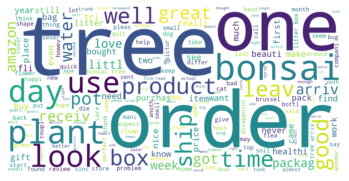

In [ ]:
#Word_cloud for cluster 3

show_wordcloud(cluster3)

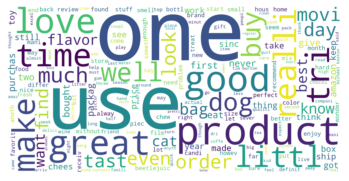

In [ ]:
#Word_cloud for cluster 4

show_wordcloud(cluster4)

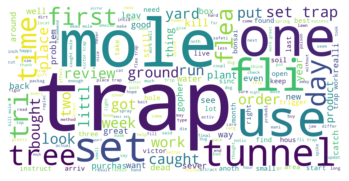

In [ ]:
#Word_cloud for cluster 5

show_wordcloud(cluster5)

# Applying Agglomerative Clustering on TFIDF W2V features

In [ ]:
tfidf_avgw2v.shape

(5000, 50)

 Applying Agglomerative Clustering with 2 cluster

In [ ]:
model=AgglomerativeClustering(n_clusters=2)
model.fit(tfidf_avgw2v)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(cloud_tfw2v[i])
    else :
        cluster2.append(cloud_tfw2v[i])
         
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))

No. of reviews in Cluster-1 :  4239

No. of reviews in Cluster-2 :  761


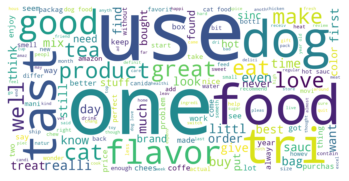

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

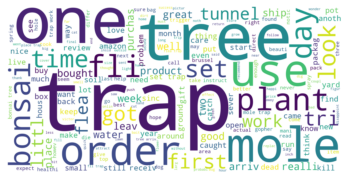

In [ ]:
#Word_cloud for cluster 2

show_wordcloud(cluster2)

 Applying Agglomerative Clustering with 5 cluster

In [ ]:
model=AgglomerativeClustering(n_clusters=5)
model.fit(tfidf_avgw2v)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [ ]:
cluster1,cluster2,cluster3,cluster4,cluster5=[],[],[],[],[]

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(cloud_tfw2v[i])
    elif model.labels_[i] == 1:
        cluster2.append(cloud_tfw2v[i])
    elif model.labels_[i] == 2:
        cluster3.append(cloud_tfw2v[i])
    elif model.labels_[i] == 3:
        cluster4.append(cloud_tfw2v[i])
    else :
        cluster5.append(cloud_tfw2v[i])
         
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))
print("\nNo. of reviews in Cluster-5 : ",len(cluster5))

No. of reviews in Cluster-1 :  1244

No. of reviews in Cluster-2 :  1101

No. of reviews in Cluster-3 :  673

No. of reviews in Cluster-4 :  1894

No. of reviews in Cluster-5 :  88


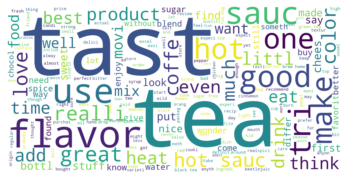

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

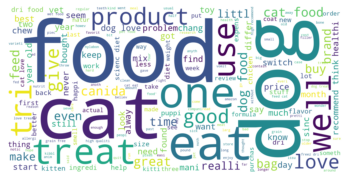

In [ ]:
#Word_cloud for cluster 2

show_wordcloud(cluster2)

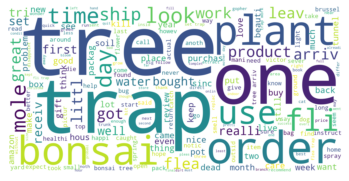

In [ ]:
#Word_cloud for cluster 3

show_wordcloud(cluster3)

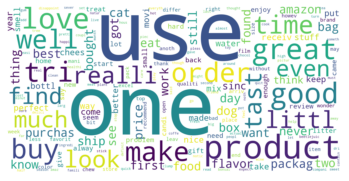

In [ ]:
#Word_cloud for cluster 4

show_wordcloud(cluster4)

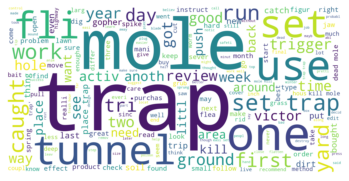

In [ ]:
#Word_cloud for cluster 5

show_wordcloud(cluster5)

## DBSCAN Clustering

# Applying DBSCAN on AVG W2V

In [ ]:
avgw2v.shape

(5000, 50)

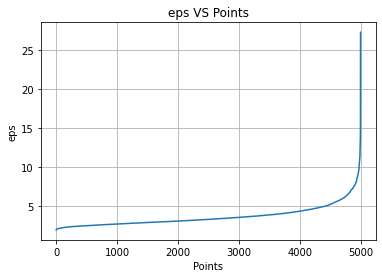

In [ ]:
min_points = 100
from sklearn.preprocessing import StandardScaler
data=StandardScaler().fit_transform(avgw2v)
# Computing distances of nth-nearest neighbours
distance=[]
for x in data:
    value=np.sort(np.sum((data-x)**2,axis=1),axis=None)
    distance.append(value[min_points])
final_eps=np.sqrt(np.array(distance))    

sorted_dist = np.sort(final_eps)
points = [point for point in range(len(avgw2v))]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_dist)
plt.xlabel('Points')
plt.ylabel('eps')
plt.title('eps VS Points')
plt.grid()
plt.show()

From above graph, we can see that the optimal value of Epsilon is 6 because after that there is sharp rise

In [ ]:
#we can see that point of inflexion is at eps=6
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=6, n_jobs=-1)
dbscan.fit(avgw2v)
print('No of clusters: ',len(set(dbscan.labels_)))
print('Cluster are ignoring (-1 for noise ): ',set(dbscan.labels_))

No of clusters:  1
Cluster are ignoring (-1 for noise ):  {0}


In [ ]:
#ignoring -1 as it is for noise
cluster1=[]
for i in range(dbscan.labels_.shape[0]):
    if dbscan.labels_[i] == 0:
        cluster1.append(cloud_w2v[i])

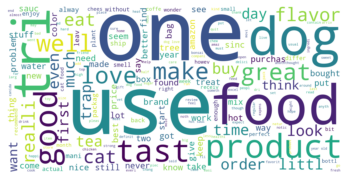

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

In [ ]:
#This function is used to plot a word cloud given a text corpus.
def plot_word_clouds_db(review_corpus,cluster_name):
    wordcloud = WordCloud(width=800, height=450, margin=2, max_font_size=50, scale=1, max_words=100, 
                          random_state=42, background_color='black', repeat=False).generate(str(review_corpus))
    plt.figure(figsize=(16,9))
    if cluster_name == -1:
        plt.title("Word Cloud for Cluster {} (Noisy Cluster)".format(cluster_name))
    else:
        plt.title("Word Cloud for Cluster {} (Dense Cluster)".format(cluster_name+1))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
def draw_word_clouds_clusters_db(model, X_corpus):
    reviews=list(X_corpus)
    labels=model.labels_ #Labels of each data point
    clusters_list=list(set(labels)) #List of all unique clusters
    no_of_clusters = len(set(labels)) #Total number of clusters obtained.
    
    for cluster_name in clusters_list:
        cluster_reviews = []
        review_count = 1      
        for i in range(labels.shape[0]):
            if (labels[i] == cluster_name):
                cluster_reviews.append(reviews[i])
        plot_word_clouds_db(cluster_reviews,cluster_name)

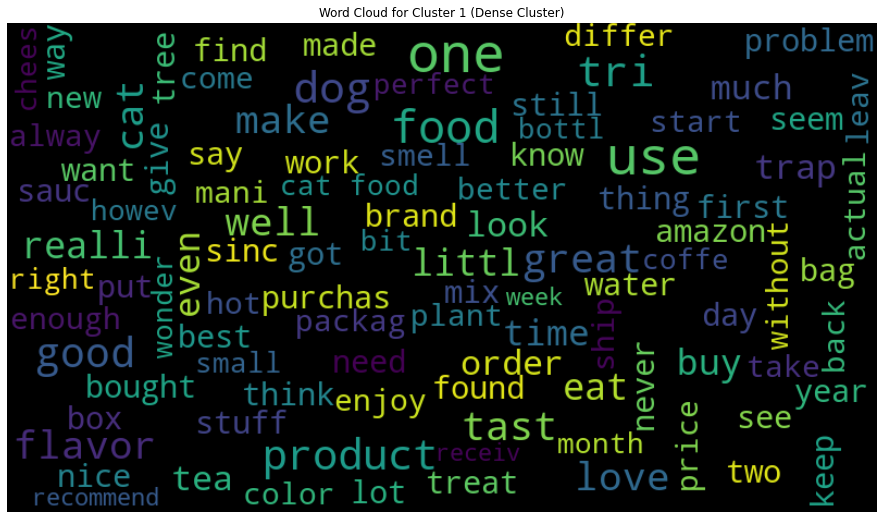

In [ ]:
draw_word_clouds_clusters_db(dbscan, X)

# Applying DBSCAN on TFIDF W2V

In [ ]:
tfidf_avgw2v.shape

(5000, 50)

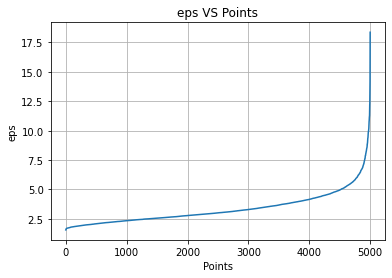

In [ ]:
min_points = 100
from sklearn.preprocessing import StandardScaler
data=StandardScaler().fit_transform(tfidf_avgw2v)
# Computing distances of nth-nearest neighbours
distance=[]
for x in data:
    value=np.sort(np.sum((data-x)**2,axis=1),axis=None)
    distance.append(value[min_points])
final_eps=np.sqrt(np.array(distance))    

sorted_dist = np.sort(final_eps)
points = [point for point in range(len(avgw2v))]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_dist)
plt.xlabel('Points')
plt.ylabel('eps')
plt.title('eps VS Points')
plt.grid()
plt.show()

In [ ]:
#we can see that point of inflexion is at eps=5
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, n_jobs=-1)
dbscan.fit(tfidf_avgw2v)
print('No of clusters: ',len(set(dbscan.labels_)))
print('Cluster are ignoring (-1 for noise ): ',set(dbscan.labels_))

No of clusters:  1
Cluster are ignoring (-1 for noise ):  {0}


In [ ]:
#ignoring -1 as it is for noise
cluster1=[]
for i in range(dbscan.labels_.shape[0]):
    if dbscan.labels_[i] == 0:
        cluster1.append(cloud_tfw2v[i])

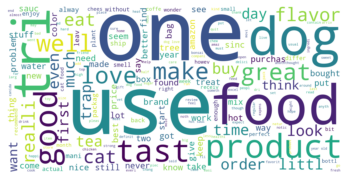

In [ ]:
#Word_cloud for cluster 1

show_wordcloud(cluster1)

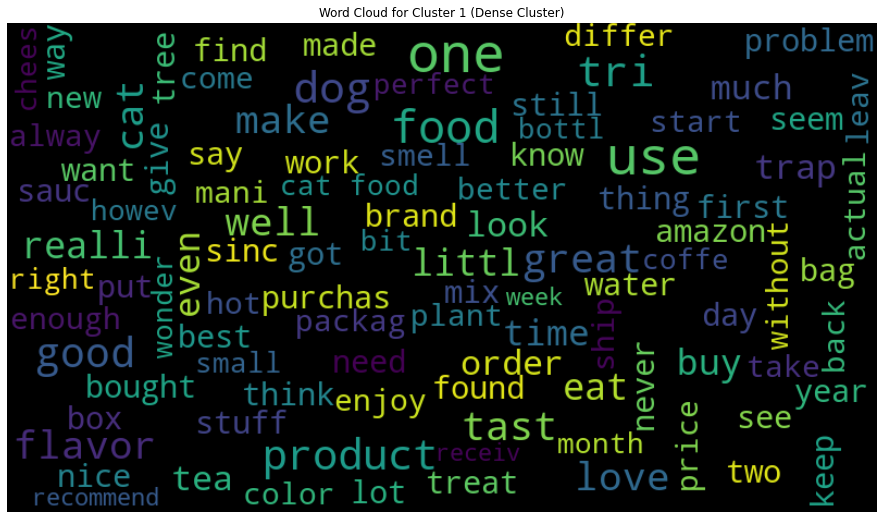

In [ ]:
# Wordclouds of clusters obtained after applying DBSCAN
draw_word_clouds_clusters_db(dbscan, X)

# Conclusion

In [ ]:
from prettytable import PrettyTable
x = PrettyTable() 

x.field_names = ["Vectorizer","Model","Optimal_Cluster"]
x.add_row(["BOW","Kmeans_Clustering",5])
x.add_row(["TFIDF","Kmeans_Clustering",5])
x.add_row(["AVG_W2vec","Kmeans_Clustering",4])
x.add_row(["TFIDF_W2vec","Kmeans_Clustering",4])
print(x)

x = PrettyTable() 
x.field_names = ["Vectorizer","Optimal epsilon"]

x.add_row(['AVG_W2vec',6])
x.add_row(['TFIDF_W2vec',5])
print(x)





+-------------+-------------------+-----------------+
|  Vectorizer |       Model       | Optimal_Cluster |
+-------------+-------------------+-----------------+
|     BOW     | Kmeans_Clustering |        5        |
|    TFIDF    | Kmeans_Clustering |        5        |
|  AVG_W2vec  | Kmeans_Clustering |        4        |
| TFIDF_W2vec | Kmeans_Clustering |        4        |
+-------------+-------------------+-----------------+
+-------------+-----------------+
|  Vectorizer | Optimal epsilon |
+-------------+-----------------+
|  AVG_W2vec  |        6        |
| TFIDF_W2vec |        5        |
+-------------+-----------------+


# observations

1) For K means clustering we applied k-means for different value of k and selected optimal k with the help of elbow method from graph between inertia vs k.

2) We sorted out top 5 features in each clusters of Bow and TFIDF vectorize.

3) For agglomerative clustering we took n_clusters=[2,3] and applied algorithm on it and plotted the word cloud for each clusters.

4) And at the end we applied DBSCAN on Avg-W2vec and TFIDF-W2vec, for optimal eps we first calculated the nth distance from each point, sorted them and plotted the curve between points and distances and the again we applied elbow method to figure out the best eps(At point of inflexion).